In [1]:
from nltk.corpus import wordnet as wn

In [2]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)
right.lowest_common_hypernyms(orca)
right.lowest_common_hypernyms(tortoise)
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

In [3]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [4]:
wn.synset('whale.n.02').min_depth()

13

In [5]:
wn.synset('vertebrate.n.01').min_depth()

8

In [6]:
wn.synset('entity.n.01').min_depth()

0

Similarity measures have been defined over the collection of WordNet synsets which incorporate the above insight. For
example, path_similarity assigns a score in the range 0–1 based on the shortest path that connects the concepts in the
hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will
return 1. Consider the following similarity scores, relating right whale to minke whale, orca, tortoise, and novel. Although
the numbers won't mean much, they decrease as we move away from the semantic space of sea creatures to inanimate
objects.

# Summary
A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus,
nltk.corpus.brown. <br>
Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other. <br>
A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. <br>
They can be used for counting word frequencies, given a context or a genre. <br>
Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py
extension, and accessed using an import statement. <br>
Python functions permit you to associate a name with a particular block of code, and re-use that code as often as
necessary. <br>
Some functions, known as "methods", are associated with an object and we give the object name followed by a
period followed by the function, like this: x.funct(y), e.g., word.isalpha(). <br>
To find out about some variable v, type help(v) in the Python interactive interpreter to read the help entry for this
kind of object. <br>
WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and
organized into a network. <br>
Some functions are not available by default, but must be accessed using Python's import statement. <br>

# Processing Raw Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections to explore,
such as the corpora we saw in the previous chapters. However, you probably have your own text sources in mind, and
need to learn how to access them.
The goal of this chapter is to answer the following questions:
1. How can we write programs to access text from local files and from the web, in order to get hold of an unlimited
range of language material?
2. How can we split documents up into individual words and punctuation symbols, so we can carry out the same
kinds of analysis we did with text corpora in earlier chapters?
3. How can we write programs to produce formatted output and save it in a file?
In order to address these questions, we will be covering key concepts in NLP, including tokenization and stemming.
Along the way you will consolidate your Python knowledge and learn about strings, files, and regular expressions. Since
so much text on the web is in HTML format, we will also see how to dispense with markup.

In [7]:
from __future__ import division # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize

Text number 2554 is an English translation of Crime and Punishment, and we can access it as follows.

In [8]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
#url = "https://bookdown.org/ejvanholm/Textbook/r-markdown-guide.html"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)


str

In [9]:

len(raw)



1176967

In [10]:
raw[:100]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the '

The read() process will take a few seconds as it downloads this large book. If you're using an internet
proxy which is not correctly detected by Python, you may need to specify the proxy manually, before
using urlopen, as follows:
- proxies = {'http': 'http://www.someproxy.com:3128'}
- request.ProxyHandler(proxies)

The variable raw contains a string with 1,176,893 characters. (We can see that it is a string, using type(raw).) This is the
raw content of the book, including many details we are not interested in such as whitespace, line breaks and blank lines.
Notice the \r and \n in the opening line of the file, which is how Python displays the special carriage return and line
feed characters (the file must have been created on a Windows machine). For our language processing, we want to break
up the string into words and punctuation, as we saw in 1.. This step is called tokenization, and it produces our familiar
structure, a list of words and punctuation.

In [11]:
tokens = word_tokenize(raw)

In [12]:
type(tokens)

list

In [13]:
len(tokens)

257727

In [14]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

Notice that NLTK was needed for tokenization, but not for any of the earlier tasks of opening a URL and reading it into
a string. If we now take the further step of creating an NLTK text from this list, we can carry out all of the other
linguistic processing we saw in 1., along with the regular list operations like slicing:

In [15]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [16]:
text[1024:1062]

['an',
 'exceptionally',
 'hot',
 'evening',
 'early',
 'in',
 'July',
 'a',
 'young',
 'man',
 'came',
 'out',
 'of',
 'the',
 'garret',
 'in',
 'which',
 'he',
 'lodged',
 'in',
 'S.',
 'Place',
 'and',
 'walked',
 'slowly',
 ',',
 'as',
 'though',
 'in',
 'hesitation',
 ',',
 'towards',
 'K.',
 'bridge',
 '.',
 'He',
 'had',
 'successfully']

In [17]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [18]:
raw.find("PART I")


5336

In [19]:
raw.rfind("End of Project Gutenberg's Crime")


-1

In [20]:
raw = raw[5338:1157743]


In [21]:
raw.find("PART I")

195769

## Dealing with HTML

Much of the text on the web is in the form of HTML documents. You can use a web browser to save a page as text to a
local file, then access this as described in the section on files below. However, if you're going to do this often, it's easiestto get Python to do the work directly. The first step is the same as before, using urlopen. For fun we'll pick a BBC News
titled **Heart risk link to big families** : 

In [22]:
url = "http://news.bbc.co.uk/2/hi/health/2770999.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

We can see the HTML content in all its glory, including meta tags, an image map, JavaScript,
forms, and tables, by the following code 

In [23]:
print(html)

<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<title>BBC NEWS | Health | Heart risk link to big families</title>
<meta name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">
<meta name="OriginalPublicationDate" content="2003/02/18 00:23:33">
<meta name="UKFS_URL" content="/1/hi/health/2770999.stm">
<meta name="IFS_URL" content="/2/hi/health/2770999.stm">
<meta http-equiv="content-type" content="text/html;charset=iso-8859-1">

<meta name="Headline" content="Heart risk link to big families">
<meta name="Section" content="Health">
<meta name="Description" content="People who have big families appear to be at increased risk of heart disease, research suggests.">
<!-- GENMaps-->
<map name="banner">
<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT">
</map>

<script src="/nol/shared/js/livestats_v1_1.js" languag

To get text out of HTML we will use a Python library called BeautifulSoup, available from
http://www.crummy.com/software/BeautifulSoup/

In [24]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Heart',
 'risk',
 'link',
 'to',
 'big',
 'families',
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Tuesday',
 ',',
 '18',
 'February',
 ',',
 '2003',
 ',',
 '00:23',
 'GMT',
 'Heart',
 'ri

This still contains unwanted material concerning site navigation and related stories. With some trial and error you can
find the start and end indexes of the content and select the tokens of interest, and initialize a text as before.

In [25]:
tokens = tokens[110:1000]
text = nltk.Text(tokens)
text.concordance('heart')

Displaying 11 of 11 matches:
es appear to be at increased risk of heart disease , research suggests . Two la
e lowest risk of developing coronary heart disease ( CHD ) . Those who had more
study was part funded by the British Heart Foundation . A spokesperson said : `
ps are at a greater risk of coronary heart disease ( CHD ) due to the pressures
irculation : Journal of the American Heart Association . See also : 12 Sep 02 |
10 Feb 03 | Health Women 'unaware of heart risk' 04 Dec 02 | Health UK heart fa
of heart risk' 04 Dec 02 | Health UK heart failure toll rises Internet links : 
irculation : Journal of the American Heart AssociationBritish Heart FoundationD
he American Heart AssociationBritish Heart FoundationDepartment of Social Medic
ernet sites Top Health stories now : Heart risk link to big families Back pain 
 more Health stories In This Section Heart risk link to big families Back pain 


## Processing Search Engine Results - Processing RSS Feeds

In [26]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog['feed']['title']
len(llog.entries)

13

In [27]:
post = llog.entries[2]
post.title

'An 8th-century Chinese epitaph written by a Japanese courtier'

In [28]:
content

NameError: name 'content' is not defined

In [ ]:
content = post.content[0].value
content[:70]

In [29]:
raw = BeautifulSoup(content, 'html.parser').get_text()
word_tokenize(raw)

NameError: name 'content' is not defined

Reading Local Files
In order to read a local file, we need to use Python's built-in open() function, followed by the read() method. Suppose
you have a file document.txt, you can load its contents like this:


In [30]:
f = open('D://tin')
raw = f.read()

In [31]:
print(f.read())

examine the
current directory from within Python:

In [32]:
import os
os.listdir('.')

['.anaconda',
 '.android',
 '.AndroidStudio3.5',
 '.bash_history',
 '.conda',
 '.condarc',
 '.config',
 '.docker',
 '.gitconfig',
 '.gradle',
 '.IdeaIC2019.2',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.nx',
 '.python_history',
 '.spyder-py3',
 '.ssh',
 '.x2go',
 '3D Objects',
 '3dGraph.png',
 'AI 2.ipynb',
 'AI 3.ipynb',
 'AndroidStudioProjects',
 'AppData',
 'Application Data',
 'Artificial Intelligence PYTHON 1.ipynb',
 'Artificial Intelligence PYTHON.ipynb',
 'assocplots',
 'B04958_01_05.png',
 'B04958_01_07.png',
 'B04958_01_08.png',
 'Bayesian Hierachical.ipynb',
 'bioinformatician test.ipynb',
 'Biopython example.ipynb',
 'ccnet',
 'company.db',
 'company.db-journal',
 'Contacts',
 'Cookies',
 'data',
 'Desktop',
 'Diagram with Python Jupyter.ipynb',
 'Documents',
 'Downloads',
 'edb_psqlodbc.exe',
 'example.db',
 'example.h5',
 'Favorites',
 'ffmpeg',
 'gemini',
 'GWAS with python.ipynb',
 'hail-20191121-1821-0.2.27-26d2d88eb70b.l

We can also read a file one line at a time using a for loop:

In [33]:
f = open('D:\\tin', 'rU')
for line in f:
    print(line.strip())

Orkney has been invaded by geese. The numbers are now so huge, and the damage so great, that permission has been granted for the wild birds to be shot - and eaten, reports the BBC's Emma Jane Kirby.
In most situations it would be deemed unwise to tramp across a farmer's fields in the wee small hours dressed in camouflage gear while carrying weapons, but Steve Rogers marches confidently across the frozen grass of Stromness, Orkney, frosted blades snapping and icy puddles splintering under his combat boots, as we approach a saltwater loch where we can hear the faint honking of resident geese.
"I'll get the hide up first," whispers Steve into the darkness as he plonks a rolled-up grille intricately laced with reeds onto the ground and unwinds it.
"Then I'll set some decoys so they'll think their little friends are already feeding." He smiles at the two men following him. "You boys get your guns ready."
In 2002, according to RSPB figures, there were just 300 breeding pairs of greylag geese

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

'U' mode is deprecated



Here we use the strip() method to remove the newline character at the end of the input line.
NLTK's corpus files can also be accessed using these methods. We simply have to use nltk.data.find() to get the
filename for any corpus item. Then we can open and read it in the way we just demonstrated above:

In [34]:
path = nltk.data.find('D:\\tin')
raw = open(path).read()

In [35]:
raw

'Orkney has been invaded by geese. The numbers are now so huge, and the damage so great, that permission has been granted for the wild birds to be shot - and eaten, reports the BBC\'s Emma Jane Kirby. \nIn most situations it would be deemed unwise to tramp across a farmer\'s fields in the wee small hours dressed in camouflage gear while carrying weapons, but Steve Rogers marches confidently across the frozen grass of Stromness, Orkney, frosted blades snapping and icy puddles splintering under his combat boots, as we approach a saltwater loch where we can hear the faint honking of resident geese. \n"I\'ll get the hide up first," whispers Steve into the darkness as he plonks a rolled-up grille intricately laced with reeds onto the ground and unwinds it.\n"Then I\'ll set some decoys so they\'ll think their little friends are already feeding." He smiles at the two men following him. "You boys get your guns ready." \nIn 2002, according to RSPB figures, there were just 300 breeding pairs of 

In [36]:
type(raw)

str

In [37]:
#s = input("Enter some text: ")
#print("You typed", len(word_tokenize(s)), "words.")

In [38]:
tokens = word_tokenize(raw)

In [39]:
type(tokens)

list

In [40]:
words = [w.lower() for w in tokens]

In [41]:
vocab = sorted(set(words))

In [42]:
type(vocab)

list

In [47]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'HUNG' * i for i in a]
for line in b:print(line)

            HUNG
          HUNGHUNG
        HUNGHUNGHUNG
      HUNGHUNGHUNGHUNG
    HUNGHUNGHUNGHUNGHUNG
  HUNGHUNGHUNGHUNGHUNGHUNG
HUNGHUNGHUNGHUNGHUNGHUNGHUNG
  HUNGHUNGHUNGHUNGHUNGHUNG
    HUNGHUNGHUNGHUNGHUNG
      HUNGHUNGHUNGHUNG
        HUNGHUNGHUNG
          HUNGHUNG
            HUNG


Text(0, -0.4, 'HAPPY NEW YEAR')

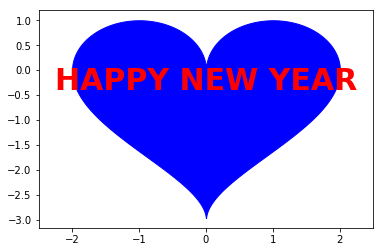

In [49]:
%matplotlib inline
import pylab
import scipy
x = scipy.linspace(-2,2,1500)
y1 = scipy.sqrt(1-(abs(x)-1)**2)
y2 = -3*scipy.sqrt(1-(abs(x)/2)**0.5)
pylab.fill_between(x, y1, color='blue')
pylab.fill_between(x, y2, color='blue')
pylab.xlim([-2.5, 2.5])
pylab.text(0, -0.4, 'HAPPY NEW YEAR', fontsize=30, fontweight='bold',
           color='red', horizontalalignment='center')

In [50]:
beatles = ['John', 'Paul', 'George', 'Ringo']
beatles[0] 


'John'

In [51]:
del beatles[-1]
beatles


['John', 'Paul', 'George']

## Text Processing with Unicode

In [53]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [54]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [56]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


We find the integer ordinal of a character using ord(). For example:

In [57]:
ord('ó')

243

In [58]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [60]:
for c in line:
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


In [61]:
line.find('zosta\u0142y')


54

In [62]:
line = line.lower()
line


'niemców pod koniec ii wojny światowej na dolny śląsk, zostały\n'

In [63]:
line.encode('unicode_escape')


b'niemc\\xf3w pod koniec ii wojny \\u015bwiatowej na dolny \\u015bl\\u0105sk, zosta\\u0142y\\n'

In [64]:
import re
m = re.search('\u015b\w*', line)
m.group()


'światowej'

In [65]:
word_tokenize(line)

['niemców',
 'pod',
 'koniec',
 'ii',
 'wojny',
 'światowej',
 'na',
 'dolny',
 'śląsk',
 ',',
 'zostały']

## Using your local encoding in Python

If you are used to working with characters in a particular local encoding, you probably want to be able to use your
standard methods for inputting and editing strings in a Python file. In order to do this, you need to include the string
'# -*- coding: <coding> -*-' as the first or second line of your file. Note that <coding> has to be a string like
'latin-1', 'big5' or 'utf-8' 

## Regular Expressions for Detecting Word Patterns

In [67]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [68]:
wordlist

['a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aardvark',
 'aardwolf',
 'aba',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'abaptiston',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'abastardize',
 'abatable',
 'abate',
 'abatement',
 'abater',
 'abatis',
 'abatised',
 'abaton',
 'abator',
 'abattoir',
 'abature',
 'abave',
 'abaxial',
 'abaxile',
 'abaze',
 'abb',
 'abbacomes',
 'abbacy',
 'abbas',
 'abbasi',
 'abbassi',


## Using Basic Meta-Characters

In [70]:
[w for w in wordlist if re.search('ed$', w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

In [71]:
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

In [72]:
#We could count the total number of occurrences of this word (in either spelling) in a text using
sum(1 for w in text if re.search('^e-?mail$', w))

0

The T9 system is used for entering text on mobile phones. Two or more words that are entered with the same
sequence of keystrokes are known as textonyms. For example, both hole and golf are entered by pressing the sequence
4653. What other words could be produced with the same sequence? Here we use the regular expression
«^[ghi][mno][jlk][def]$»:

In [73]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

In [74]:
[w for w in wordlist if re.search('^[ghijklmno]+$', w)]

['g',
 'ghoom',
 'gig',
 'giggling',
 'gigolo',
 'gilim',
 'gill',
 'gilling',
 'gilo',
 'gim',
 'gin',
 'ging',
 'gingili',
 'gink',
 'ginkgo',
 'ginning',
 'gio',
 'glink',
 'glom',
 'glonoin',
 'gloom',
 'glooming',
 'gnomon',
 'go',
 'gog',
 'gogo',
 'goi',
 'going',
 'gol',
 'goli',
 'gon',
 'gong',
 'gonion',
 'goo',
 'googol',
 'gook',
 'gool',
 'goon',
 'h',
 'hi',
 'high',
 'hill',
 'him',
 'hin',
 'hing',
 'hinoki',
 'ho',
 'hog',
 'hoggin',
 'hogling',
 'hoi',
 'hoin',
 'holing',
 'holl',
 'hollin',
 'hollo',
 'hollong',
 'holm',
 'homo',
 'homologon',
 'hong',
 'honk',
 'hook',
 'hoon',
 'i',
 'igloo',
 'ihi',
 'ilk',
 'ill',
 'imi',
 'imino',
 'immi',
 'in',
 'ing',
 'ingoing',
 'inion',
 'ink',
 'inkling',
 'inlook',
 'inn',
 'inning',
 'io',
 'ion',
 'j',
 'jhool',
 'jig',
 'jing',
 'jingling',
 'jingo',
 'jinjili',
 'jink',
 'jinn',
 'jinni',
 'jo',
 'jog',
 'johnin',
 'join',
 'joining',
 'joll',
 'joom',
 'k',
 'kiki',
 'kil',
 'kilhig',
 'kilim',
 'kill',
 'killing',

In [75]:
[w for w in wordlist if re.search('^[a-fj-o]+$', w)]

['a',
 'aa',
 'aal',
 'aam',
 'aba',
 'abac',
 'abaca',
 'aback',
 'abaff',
 'abalone',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonee',
 'abb',
 'abdal',
 'abdomen',
 'abeam',
 'abed',
 'abele',
 'able',
 'abloom',
 'abode',
 'abolla',
 'aboma',
 'aboon',
 'academe',
 'acana',
 'acca',
 'accede',
 'accedence',
 'accend',
 'accolade',
 'accoladed',
 'accolle',
 'accommodable',
 'ace',
 'ackman',
 'acle',
 'acme',
 'acne',
 'acnodal',
 'acnode',
 'acock',
 'acold',
 'acoma',
 'acone',
 'ad',
 'adad',
 'adance',
 'add',
 'adda',
 'addable',
 'added',
 'addend',
 'addenda',
 'addle',
 'ade',
 'adead',
 'adeem',
 'adenocele',
 'adenoma',
 'adman',
 'ado',
 'adobe',
 'ae',
 'aefald',
 'aenean',
 'aeon',
 'aface',
 'affa',
 'affable',
 'aflame',
 'afoam',
 'ajaja',
 'ak',
 'aka',
 'akala',
 'ake',
 'akeake',
 'akee',
 'aknee',
 'ako',
 'al',
 'ala',
 'alack',
 'alada',
 'alala',
 'alameda',
 'alamo',
 'alan',
 'aland',
 'alb',
 'alba',
 'alban',
 'albe',
 'albedo',
 'albee',
 'alcalde

In [76]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [77]:
[w for w in chat_words if re.search('^[ha]+$', w)]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

In [78]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7',
 '0.82',
 '0.84',
 '0.9',
 '0.95',
 '0.99',
 '1.01',
 '1.1',
 '1.125',
 '1.14',
 '1.1650',
 '1.17',
 '1.18',
 '1.19',
 '1.2',
 '1.20',
 '1.24',
 '1.25',
 '1.26',
 '1.28',
 '1.35',
 '1.39',
 '1.4',
 '1.457',
 '1.46',
 '1.49',
 '1.5',
 '1.50',
 '1.55',
 '1.56',
 '1.5755',
 '1.5805',
 '1.6',
 '1.61',
 '1.637',
 '1.64',
 '1.65',
 '1.7',
 '1.75',
 '1.76',
 '1.8',
 '1.82',
 '1.8415',
 '1.85',
 '1.8500',
 '1.9',
 '1.916',
 '1.92',
 '10.19',
 '10.2',
 '10.5',
 '107.03',
 '107.9',
 '109.73',
 '11.10',
 '11.5',
 '11.57',
 '11.6',
 '11.72',
 '11.95',
 '112.9',
 '113.2',
 '116.3',
 '116.4',
 '116.7',
 '116.9',
 '118.6',
 '12.09',
 '12.5',
 '12.52',
 '12.68',
 '12.7',
 '12.82',
 '12.97',
 '120.7',
 '1206.26',
 '121.6',
 '126.1',
 '126.15',
 '127.03',
 '129.91',
 '13.1',
 '13.15',
 '13.5',
 '13.50',
 '13.625',
 '13.65',
 '13.73',
 '13.8',
 '13.90',
 '130.6',
 '130.7',
 '

In [79]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

In [80]:
[w for w in wsj if re.search('^[0-9]{4}$', w)]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934',
 '1948',
 '1953',
 '1955',
 '1956',
 '1961',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1976',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2005',
 '2009',
 '2017',
 '2019',
 '2029',
 '3057',
 '8300']

In [81]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point',
 '20-point',
 '20-stock',
 '21-month',
 '237-seat',
 '240-page',
 '27-year',
 '30-day',
 '30-point',
 '30-share',
 '30-year',
 '300-day',
 '36-day',
 '36-store',
 '42-year',
 '50-state',
 '500-stock',
 '52-week',
 '69-point',
 '84-month',
 '87-store',
 '90-day']

In [82]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [83]:
[w for w in wsj if re.search('(ed|ing)$', w)]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything',
 'Arbitrage-related',
 'Arbitraging',
 'Asked',
 'Assuming',
 'Atlanta-based',
 'Baking',
 'Banking',
 'Beginning',
 'Beijing',
 'Being',
 'Bermuda-based',
 'Betting',
 'Boeing',
 'Broadcasting',
 'Bucking',
 'Buying',
 'Calif.-based',
 'Change-ringing',
 'Citing',
 'Concerned',
 'Confronted',
 'Conn.based',
 'Consolidated',
 'Continued',
 'Continuing',
 'Declining',
 'Defending',
 'Depending',
 'Designated',
 'Determining',
 'Developed',
 'Died',
 'During',
 'Encouraged',
 'Encouraging',
 'English-speaking',
 'Estimated',
 'Everything',
 'Excluding',
 'Exxon-owned',
 'Faulding',
 'Fed',
 'Feeding',
 'Filling',
 'Filmed',
 'Financing',
 'Following',
 'Founded',
 'Fracturing',
 'Francisco-based',
 'Fred',
 'Funded',
 'Funding',
 'Generalized',
 'Germany-based',
 'Getting',
 'Guaranteed',
 'Having',
 'Heating',
 'Heightened',
 'Holding',
 'Housing',
 'Illumin

**Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures**

|Operator |Behavior|
| -- | -- |
| . | Wildcard, matches any character| 
| ^abc | Matches some pattern abc at the start of a string| 
| abc$ | Matches some pattern abc at the end of a string| 
| [abc] | Matches one of a set of characters| 
| [A-Z0-9] | Matches one of a range of characters| 
| ed\|ing\|s | Matches one of the specified strings (disjunction)| 
|* | Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)|
|+ | One or more of previous item, e.g. a+, [a-z]+|
|? |Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?|
|{n} |Exactly n repeats where n is a non-negative integer|
|{n,} |At least n repeats|
|{,n} |No more than n repeats|
|{m,n} |At least m and no more than n repeats|
|a(b\|c)+ |Parentheses that indicate the scope of the operators|

In [84]:
word = 'supercalifragilisticexpialidocious'

In [85]:
re.findall(r'[aeiou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

In [86]:
len(re.findall(r'[aeiou]', word))

16

In [87]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
    for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

## Doing More with Word Pieces

We use re.findall() to extract all the matching
pieces, and ''.join() to join them together

In [95]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

In [96]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')

print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

In [97]:
english_udhr[:75]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of',
 'all',
 'members',
 'of',
 'the',
 'human',
 'family',
 'is',
 'the',
 'foundation',
 'of',
 'freedom',
 ',',
 'justice',
 'and',
 'peace',
 'in',
 'the',
 'world',
 ',',
 'Whereas',
 'disregard',
 'and',
 'contempt',
 'for',
 'human',
 'rights',
 'have',
 'resulted',
 'in',
 'barbarous',
 'acts',
 'which',
 'have',
 'outraged',
 'the',
 'conscience',
 'of',
 'mankind',
 ',',
 'and',
 'the',
 'advent',
 'of',
 'a',
 'world',
 'in',
 'which',
 'human',
 'beings',
 'shall',
 'enjoy',
 'freedom',
 'of',
 'speech',
 'and']

In [98]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


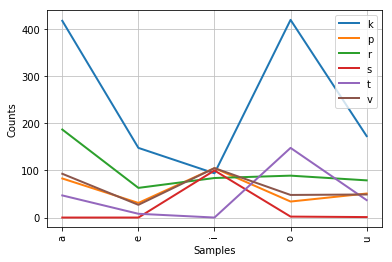

In [99]:
cfd.plot()

In [100]:
cv_word_pairs = [(cv, w) for w in rotokas_words
for cv in re.findall(r'[ptksvr][aeiou]', w)]

In [101]:
cv_index = nltk.Index(cv_word_pairs)

In [102]:
cv_index['su']

['kasuari']

In [103]:
cv_index['po']

['kaapo',
 'kaapopato',
 'kaipori',
 'kaiporipie',
 'kaiporivira',
 'kapo',
 'kapoa',
 'kapokao',
 'kapokapo',
 'kapokapo',
 'kapokapoa',
 'kapokapoa',
 'kapokapora',
 'kapokapora',
 'kapokaporo',
 'kapokaporo',
 'kapokari',
 'kapokarito',
 'kapokoa',
 'kapoo',
 'kapooto',
 'kapoovira',
 'kapopaa',
 'kaporo',
 'kaporo',
 'kaporopa',
 'kaporoto',
 'kapoto',
 'karokaropo',
 'karopo',
 'kepo',
 'kepoi',
 'keposi',
 'kepoto']

## Finding Word Stems

In [106]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
        return word

In [107]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [108]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [109]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

In [110]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

In [111]:
 re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

In [112]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

In [114]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

In [116]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
 is no basis for a system of government. Supreme executive power derives from
 a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

In [117]:
tokens

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## Searching Tokenized Text
We can use a special kind of regular expression for searching across multiple words in a text (where a text is a list of
tokens). For example, "<a> <man>" finds all instances of a man in the text. The angle brackets are used to mark token
boundaries, and any whitespace between the angle brackets is ignored (behaviors that are unique to NLTK's findall()
method for texts). In the following example, we include <.*> which will match any single token, and enclose it in
parentheses so only the matched word (e.g. monied) and not the matched phrase (e.g. a monied man) is produced. The
second example finds three-word phrases ending with the word bro . The last example finds sequences of three or
more words starting with the letter l

In [119]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [120]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


In [121]:
chat.findall(r"<l.*>{3,}")

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [122]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


In [124]:
hobbies_learned[1:100]

['often',
 'a',
 'beginning',
 'bodybuilder',
 'has',
 'to',
 'do',
 'his',
 'training',
 'secretly',
 'either',
 'because',
 'his',
 'parents',
 "don't",
 'want',
 'sonny-boy',
 'to',
 '``',
 'lift',
 'all',
 'those',
 'old',
 'barbell',
 'things',
 "''",
 'because',
 '``',
 "you'll",
 'stunt',
 'your',
 'growth',
 "''",
 'or',
 'because',
 'childish',
 'taunts',
 'from',
 'his',
 'schoolmates',
 ',',
 'like',
 '``',
 'Hey',
 'lookit',
 'Mr.',
 'America',
 ';',
 ';',
 'whaddya',
 'gonna',
 'do',
 'with',
 'all',
 'those',
 'muscles',
 '(',
 'of',
 'which',
 'he',
 'has',
 'none',
 'at',
 'the',
 'time',
 ')',
 "''",
 '?',
 '?',
 'After',
 'all',
 ',',
 'a',
 "guy's",
 'gotta',
 'have',
 'a',
 'little',
 'ego',
 '!',
 '!',
 'Therefore',
 "it's",
 'a',
 'genuine',
 'pleasure',
 'to',
 'tell',
 'you',
 'about',
 'an',
 'entirely',
 'happy',
 'bodybuilder',
 'who',
 'has',
 'never',
 'had',
 'to']

## Normalizing Text

In [125]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
 a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these in preference
to crafting your own using regular expressions, since these handle a wide range of irregular cases. The Porter and
Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the
word lying (mapping it to lie), while the Lancaster stemmer does not.

In [126]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]

['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

In [127]:
[lancaster.stem(t) for t in tokens]

['den',
 ':',
 'list',
 ',',
 'strange',
 'wom',
 'lying',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'bas',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'pow',
 'der',
 'from',
 'a',
 'mand',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'som',
 'farc',
 'aqu',
 'ceremony',
 '.']

In [128]:
class IndexedText(object):
    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))
    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4) # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)
    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [129]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


## Lemmatization
The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process
makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to
woman.

In [130]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## Regular Expressions for Tokenizing Text
Tokenization is the task of cutting a string into identifiable linguistic units that constitute a piece of language data.
Although it is a fundamental task, we have been able to delay it until now because many corpora are already tokenized,
and because NLTK includes some tokenizers. Now that you are familiar with regular expressions, you can learn how to
use them to tokenize text, and to have much more control over the process.
### Simple Approaches to Tokenization
The very simplest method for tokenizing text is to split on whitespace. Consider the following text from Alice's
Adventures in Wonderland:

In [132]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""

We could split this raw text on whitespace using raw.split(). To do the same using a regular expression, it is not enough
to match any space characters in the string since this results in tokens that contain a \n newline character; instead we
need to match any number of spaces, tabs, or newlines

In [133]:
re.split(r' ', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone\nthough),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very\nwell',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [134]:
re.split(r'[ \t\n]+', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [135]:
re.split(r'\s+', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

The regular expression «[ \t\n]+» matches one or more space, tab (\t) or newline (\n). Other whitespace characters,
such as carriage-return and form-feed should really be included too. Instead, we will use a built-in re abbreviation, \s,
which means any whitespace character. The above statement can be rewritten as re.split(r'\s+', raw).

Python provides
us with a character class \w for word characters, equivalent to [a-zA-Z0-9_]. It also defines the complement of this class
\W, i.e. all characters other than letters, digits or underscore. We can use \W in a simple regular expression to split the
input on anything other than a word character:

In [136]:
re.split(r'\W+', raw)

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't',
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 'Maybe',
 'it',
 's',
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 'tempered',
 '']

The regular expression «\w+|\S\w*» will first try to match any sequence of word characters. If no
match is found, it will try to match any non-whitespace character (\S is the complement of \s) followed by further word
characters. This means that punctuation is grouped with any following letters (e.g. 's) but that sequences of two or more
punctuation characters are separated.

In [137]:
re.findall(r'\w+|\S\w*', raw)

["'When",
 'I',
 "'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'I",
 'won',
 "'t",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '-',
 '-Maybe',
 'it',
 "'s",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 '-tempered',
 ',',
 "'",
 '.',
 '.',
 '.']

Let's generalize the \w+ in the above expression to permit word-internal hyphens and apostrophes: «\w+([-']\w+)*».
This expression means \w+ followed by zero or more instances of [-']\w+; it would match hot-tempered and it's. (We
need to include ?: in this expression for reasons discussed earlier.) We'll also add a pattern to match quote characters so
these are kept separate from the text they enclose.

In [138]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


The above expression also included «[-.(]+» which causes the double hyphen, ellipsis, and open parenthesis to be
tokenized separately

### Regular Expression Symbols
|Symbol |Function|
| -- | -- |
|\\b |Word boundary (zero width)|
|\\d |Any decimal digit (equivalent to [0-9])|
|\\D |Any non-digit character (equivalent to [^0-9])|
|\\s |Any whitespace character (equivalent to [ \t\n\r\f\v])|
|\S |Any non-whitespace character (equivalent to [^ \t\n\r\f\v])|
|\\w |Any alphanumeric character (equivalent to [a-zA-Z0-9_])|
|\\W |Any non-alphanumeric character (equivalent to [^a-zA-Z0-9_])|
|\\t |The tab character|
|\\n |The newline characte|

### NLTK's Regular Expression Tokenizer
The function nltk.regexp_tokenize() is similar to re.findall() (as we've been using it for tokenization). However,
nltk.regexp_tokenize() is more efficient for this task, and avoids the need for special treatment of parentheses. For
readability we break up the regular expression over several lines and add a comment about each line. The special (?x)
"verbose flag" tells Python to strip out the embedded whitespace and comments

In [139]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x) # set flag to allow verbose regexps
(?:[A-Z]\.)+ # abbreviations, e.g. U.S.A.
| \w+(?:-\w+)* # words with optional internal hyphens
| \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
| \.\.\. # ellipsis
| [][.,;"'?():-_`] # these are separate tokens; includes ], [
'''
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

When using the verbose flag, you can no longer use ' ' to match a space character; use \s instead. The
regexp_tokenize() function has an optional gaps parameter. When set to True, the regular expression specifies the gaps
between tokens, as with re.split().

In [140]:
# The NLTK corpus collection includes a sample of Penn Treebank data, including the raw Wall Street Journal text 
(nltk.corpus.treebank_raw.raw()) 

'.START \n\nPierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29.\nMr. Vinken is chairman of Elsevier N.V., the Dutch publishing group. \n\n.START \n\nRudolph Agnew, 55 years old and former chairman of Consolidated Gold Fields PLC, was named a nonexecutive director of this British industrial conglomerate. \n\n.START \n\nA form of asbestos once used to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than 30 years ago, researchers reported. \n\nThe asbestos fiber, crocidolite, is unusually resilient once it enters the lungs, with even brief exposures to it causing symptoms that show up decades later, researchers said.\nLorillard Inc., the unit of New York-based Loews Corp. that makes Kent cigarettes, stopped using crocidolite in its Micronite cigarette filters in 1956. \n\nAlthough preliminary findings were reported more than a year ago, the latest results appear in today\'s New England J

In [141]:
# and the tokenized version 
(nltk.corpus.treebank.words())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]

## Segmentation

### Sentence Segmentation
Manipulating texts at the level of individual words often presupposes the ability to divide a text into individual
sentences. As we have seen, some corpora already provide access at the sentence level. In the following example, we
compute the average number of words per sentence in the Brown Corpus:


In [143]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())


20.250994070456922

In [144]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


In [145]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words


Observe that the segmentation strings consist of zeros and ones. They are one character shorter than the source text,
since a text of length n can only be broken up in n-1 places. The segment() function in demonstrates that we can get
back to the original segmented text from the above representation.

In [146]:
segment(text, seg1)

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']

In [147]:
segment(text, seg2)

['do',
 'you',
 'see',
 'the',
 'kitty',
 'see',
 'the',
 'doggy',
 'do',
 'you',
 'like',
 'the',
 'kitty',
 'like',
 'the',
 'doggy']

In [148]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size

In [149]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"
segment(text, seg3)

['doyou',
 'see',
 'thekitt',
 'y',
 'see',
 'thedogg',
 'y',
 'doyou',
 'like',
 'thekitt',
 'y',
 'like',
 'thedogg',
 'y']

In [152]:
from random import randint
def flip(segs, pos):
    return segs[:pos] + str(1-int(segs[pos])) + segs[pos+1:]
def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs)-1))
    return segs
def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
                guess = flip_n(segs, round(temperature))
                score = evaluate(text, guess)
                if score < best:
                    best, best_segs = score, guess
        score, segs = best, best_segs
        temperature = temperature / cooling_rate
        print(evaluate(text, segs), segment(text, segs))
    print()
    return segs

In [153]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
61 ['doyou', 'seethe', 'kitty', 'seethe', 'doggy', 'doyo', 'u', 'lik', 'ethe', 'kitty', 'likethe', 'doggy']
61 ['doyou', 'seethe', 'kitty', 'seethe', 'doggy', 'doyo', 'u', 'lik', 'ethe', 'kitty', 'likethe', 'doggy']
61 ['doyou', 'seethe', 'kitty', 'seethe', 'doggy', 'doyo', 'u', 'lik', 'ethe', 'kitty', 'likethe', 'doggy']
61 ['doyou', 'seethe', 'kitty', 'seethe', 'doggy', 'doyo', 'u', 'lik', 'ethe', 'kitty', 'likethe', 'doggy']
61 ['doyou', 'seethe', 'kitty', 'seethe', 'doggy', 'doyo', 'u', 'lik', 'ethe', 'kitty', 'likethe', 'doggy']
57 ['doyou', 'seeth', 'ek', 'i', 'tty', 'seeth', 'e', 'doggy', 'doyou', 'lik', '

'0000101000110001010001000010000100100011000100100010000'

Non-Deterministic Search Using Simulated Annealing: begin
searching with phrase segmentations only; randomly perturb the zeros and ones proportional to the
"temperature"; with each iteration the temperature is lowered and the perturbation of boundaries is reduced.
As this search algorithm is non-deterministic, you may see a slightly different result.

## Formatting: From Lists to Strings
### From Lists to Strings
The simplest kind of structured object we use for text processing is lists of words. When we want to output these to a
display or a file, we must convert these lists into strings. To do this in Python we use the join() method, and specify the
string to be used as the "g

In [154]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
' '.join(silly)



'We called him Tortoise because he taught us .'

In [155]:
';'.join(silly)


'We;called;him;Tortoise;because;he;taught;us;.'

In [156]:
''.join(silly)

'WecalledhimTortoisebecausehetaughtus.'

In [166]:
import nltk
fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
fdist

FreqDist({'dog': 4, 'cat': 3, 'snake': 1})

In [167]:
for word in sorted(fdist):
    print('{}->{};'.format(word, fdist[word]), end=' ')

cat->3; dog->4; snake->1; 

In [168]:
'{}->{};'.format ('cat', 3)

'cat->3;'

In [169]:
'{}->'.format('cat')

'cat->'

In [170]:
'{}'.format(3)


'3'

In [171]:
'I want a {} right now'.format('coffee')


'I want a coffee right now'

In [172]:
'{} wants a {} {}'.format ('Lee', 'sandwich', 'for lunch')

'Lee wants a sandwich for lunch'

In [173]:
'{} wants a {} {}'.format ('sandwich', 'for lunch')
# Arguments to format() are consumed left to right, and any superfluous arguments are simply ignored

IndexError: tuple index out of range

In [174]:
'{} wants a {}'.format ('Lee', 'sandwich', 'for lunch')

'Lee wants a sandwich'

In [175]:
'from {1} to {0}'.format('A', 'B')

'from B to A'

In [176]:
template = 'Lee wants a {} right now'
menu = ['sandwich', 'spam fritter', 'pancake']
for snack in menu:
    print(template.format(snack))

Lee wants a sandwich right now
Lee wants a spam fritter right now
Lee wants a pancake right now


In [177]:
'{:6}'.format(41)

'    41'

In [178]:
'{:<6}' .format(41)

'41    '

So far our format strings generated output of arbitrary width on the page (or screen). We can add padding to obtain
output of a given width by inserting into the brackets a colon ':' followed by an integer. So {:6} specifies that we want
a string that is padded to width 6. It is right-justified by default for numbers , but we can precede the width specifier
with a '<' alignment option to make numbers left-justified <br>
Strings are left-justified by default, but can be right-justified with the '>' alignment option.


In [180]:
'{:6}'.format('dog')

'dog   '

In [181]:
'{:>6}'.format('dog')

'   dog'

In [182]:
import math
'{:.4f}'.format(math.pi)

'3.1416'

In [183]:
count, total = 3205, 9375
"accuracy for {} words: {:.4%}".format(total, count / total)

'accuracy for 9375 words: 34.1867%'

In [185]:
def tabulate(cfdist, words, categories):
    print('{:16}'.format('Category'), end=' ') # column headings
    for word in words:
        print('{:>6}'.format(word), end=' ')
    print()
    for category in categories:
        print('{:16}'.format(category), end=' ') # row heading
    for word in words: # for each word
        print('{:6}'.format(cfdist[category][word]), end=' ') # print table cell
    print() # end the row
    
    
    
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist((genre, word)
for genre in brown.categories()
for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
tabulate(cfd, modals, genres)

Category            can  could    may  might   must   will 
news             religion         hobbies          science_fiction  romance          humor                16     30      8      8      9     13 


In [187]:
# format string '{:{width}}' and bound a value to the width parameter in format(). This allows us to specify the width of a field using a variable.
'{:{width}}'.format('Monty Python', width=15)

'Monty Python   '

### Writing Results to a File
We have seen how to read text from files. It is often useful to write output to files as well. The following code
opens a file output.txt for writing, and saves the program output to the file

In [188]:
output_file = open('output.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word, file=output_file)


In [189]:
len(words)

str(len(words))

print(str(len(words)), file=output_file)

### Text Wrapping
When the output of our program is text-like, instead of tabular, it will usually be necessary to wrap it so that it can be
displayed conveniently. Consider the following output, which overflows its line, and which uses a complicated print
statement:

In [190]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
'more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

We can take care of line wrapping with the help of Python's textwrap module. For maximum clarity we will separate
each step onto its own line:

In [192]:
from textwrap import fill
pieces = ["{} {}".format(word, len(word)) for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)
print(wrapped.replace('_', ' '))
# Notice that there is a linebreak between more and its following number. If we wanted to avoid this, we could redefine the formatting string so that it contained no spaces, e.g. '%s_(%d),', then instead of printing the value of wrapped, we could
#print wrapped.replace('_', ' ').

After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1
After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1
